__Your name here__
<br>
Date: Jan. 23, 2023
<br>
PHYS 2030 W23

__Rubric__ (100 points total):

- Part (a) /__40 points__
     
- Part (b) /__60 points__

# <center><font color=#46769B>Exercise 6: Radioactive decay</font></center>

Radioactive decay is the process by which an unstable atomic isotope will change into a different isotope by emitting something, releasing energy in the form of some emitted particles (e.g., $\alpha$ , $\beta$, or $\gamma$ rays). Each radioactive isotope has a *lifetime* $\tau$, which could be a fraction of a second, billions of years, or anything in between.

Radioactive decay is an inherently random process because there is no way to know in advance the time $t$ for any one atom to decay. However, in a given time interval, there is a *probability* to decay that can be calculated. This is a process that we can describe using a probability distribution function $P(t)$ for the decay time $t$.

Suppose we have an isotope $A$. The law of radioactive decay tells us that the probability of $A$ surviving until time $t$ is $e^{-t/\tau_A}$, where $\tau_A$ is the lifetime for its decay.
Conversely, the probability for $A$ to decay *before* time $t$ is $(1-e^{-t/\tau_A})$. The latter is nothing more than the CDF:

$$ C(t) = \left\{ \begin{array}{cc} 1 - e^{-t/\tau_A} & {\rm for} \; t \ge 0 \\
0 & {\rm otherwise} \end{array} \right.$$

Since $P(t) = dC/dt$, we now have the PDF:

$$ P(t) = \left\{ \begin{array}{cc} \frac{1}{\tau_A} e^{-t/\tau_A} & {\rm for} \; t \ge 0 \\
0 & {\rm otherwise} \end{array} \right. \, ,$$

which you can verify has the correct normalization.

## <font color=#46769B>Introduction:</font>

Our goals for this notebook are:
- Gain experience sampling from an exponential distribution using the inverse CDF method.

Required reading:
- *Lesson 3: Sampling from arbitrary distributions*

## <font color=#46769B>Part (a)</font>

Suppose isotope $A$ decays with a lifetime $\tau_A = 10$ (e.g., 10 hours). Perform the following tasks:
- Write a code that will draw $N = 10^6$ samples for $t$ from the exponential distribution given above, using the inverse CDF method.
- Determine the half-life $t_{1/2}$ as the 50\% quantile (median) of your sample.
- Determine the time it takes for 99\% of $A$ to decay away by determining the 99\% quantile for your sample.
- Plot a histogram of your samples for $t$. On the same plot, plot the PDF $P(t)$. Be sure to add a legend to your plot and choose an appropriate bin for your histogram, and use a log scale for the $y$-axis.

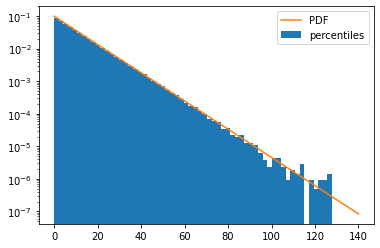

the 50% quantile is 6.945114427068216 and the 99% quantile is  46.03930923853733
17.738465538388905


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Your code here
N = 10**6
tao = 10
time = np.linspace(0,140,10)
sample = np.random.uniform(0,1,N)
#inverse CDF
t = -tao*np.log(1-sample)
plt.hist(t,density = True, bins = 60, label = "percentiles")
plt.yscale("log")
#plot
P_t =(1/tao)*np.exp(-time/10)
plt.plot(time,P_t, label = "PDF")
plt.legend()
plt.show()
#quantile
quant_50 = np.quantile(t,0.5)
quant_99 = np.quantile(t,0.99)
quant_83 = np.quantile(t,0.83)
print("the 50% quantile is", quant_50, "and the 99% quantile is ", quant_99)
print(quant_83)


## <font color=#46769B>Part (b)</font>

Consider a more complicated chain of decays, shown in the figure below. Isotope $A$, with lifetime $\tau_A = 10$, decays into isotope $B$ 83\% of the time and into isotope $C$ 17\% of the time.
Isotopes $B$ and $C$ are themselves radioactive, decaying with lifetimes $\tau_B = 2$ and $\tau_C=30$, respectively, into stable isotopes.

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/ABC_decay.png" width="200"/>
</div>

Perform the following tasks:
- Write a code that will perform a Monte Carlo simulation to generate $N = 10^6$ samples for the *total* decay time $t_{\rm tot}$. 
- Determine the total decay half-life $t_{1/2}$ as the 50\% quantile (median) of your sample for $t_{\rm tot}$.
- Determine the time it takes for 99\% of all radioactive isotopes to decay away by determining the 99\% quantile for your sample for $t_{\rm tot}$.
- Make a histogram plot of your samples for $t_{\rm tot}$ in which you *separately* plot the histograms for the $A \to B$ samples and for the $A \to C$ samples. (That is, you make two plots using `plt.hist` but you put them in the same plot. It helps to set the keyword argument `alpha=0.5` in `plt.hist` to see the overlapping histograms.) Be sure to add a legend to your plot and choose an appropriate bin for your histogram, and use a log scale for the $y$-axis.

### <font color=#46769B>Hint:</font>

The total time is
$$ t_{\rm tot} = \left\{ \begin{array}{cc} t_A + t_B & {\rm 83\% \; of\; the\; time} \\ 
t_A + t_C & {\rm 17\% \; of\; the\; time} \end{array} \right. \, ,$$
where $t_A$ is the time for $A$ to decay from part (a), and $t_B$ and $t_C$ are the times for $B$ and $C$ to decay.
So, the logic is as follows:
- Randomly sample $t_A$ as in part (a).
- Randomly sample from a discrete choice: does $A \to B$ or $A \to C$?
- Randomly sample *either* $t_B$ or $t_C$ (depending on which decay occurs), as in part (a) but using the appropriate lifetime $\tau_B$ or $\tau_C$.
- Compute $t_{\rm tot} = t_A + t_B$ or $t_A + t_C$ (depending on which decay occurs).

That is __one__ sample. Repeat $N$ times do generate $N$ samples.



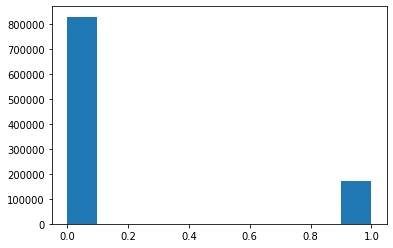

In [4]:
from matplotlib.backend_bases import tight_bbox
# Your code here
T_a = 10
T_b = 2
T_c = 30
N = 10**6
#quantile 0 to 83 should decay to B and 84 to 100 should decay to C
#Possiblilties = [B,C]
B = 0
C = 1
Possiblilties =[B,C]
Prob = [0.83,0.17]
B_1 = 0
C_1 = 0
Decay = np.random.choice(Possiblilties, N, p=Prob)
plt.hist(Decay)
Decay

for i in Decay:
  if i == 0:
    B_1 += 1
  else:
    C_1 += 1

In [ ]:
B_1

829251

In [ ]:
C_1

170749

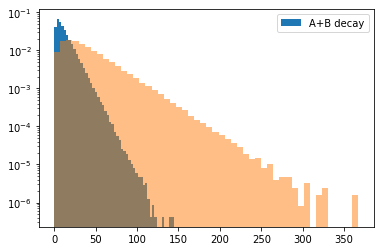

In [29]:
#B_1 and C_1 are the counts that have decayed to B and C respectively
sample_B = np.random.rand(B_1)
sample_C = np.random.rand(C_1)
time_B = -T_b*np.log(1-sample_B)

sampleAB = np.random.rand(B_1)
sampleAC = np.random.rand(C_1)


A_T_B = -tao*np.log(1-sampleAB)
A_T_C = -tao*np.log(1-sampleAC)


plt.hist(time_B+A_T_B, density = True, bins = 50, label = "A+B decay")
#plt.hist(t, density = True, bins = 50, alpha = 0.5, label = "A decay")
plt.yscale("log")
time_C = -T_c*np.log(1-sample_C)
plt.legend()
plt.hist(time_C+A_T_C, density = True, bins = 50, label = "A+C decay", alpha = 0.5)


AB99 = np.quantile(time_B+A_T_B,0.99)
AC99 = np.quantile(time_C+A_T_C,0.99)
AB50 = np.quantile(time_B+A_T_B,0.50)
AC50 = np.quantile(time_C + A_T_C, 0.50)

In [32]:
print("it takes", AB99, " hours for the total A to be sameples to decay 99% and the median is ", AB50 )

print(" it takes", AC99, " hours for the total A to be sameples to decay 99% and the median is ", AC50)

it takes 48.28587655813263  hours for the total A to be sameples to decay 99% and the median is  9.107832013073038
 it takes 149.50096932423233  hours for the total A to be sameples to decay 99% and the median is  31.676236623271947
